In [1]:
# TODO, show differences related to post-selecting for depth vs post-selectng for total gates added
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("qft.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
total_work = 24
transpilers = [
    QiskitLevel3(coupling_map),  # 20,4,20
    SabreMS(
        coupling_map,
        name="SABREMS-MinSwaps",
        cost_function="basic",
        swap_trials=20,
        fixed_aggression=1,
    ),
    SabreMS(coupling_map, name="SABREMS-MinDepth", swap_trials=20, fixed_aggression=1),
    # SabreMS(coupling_map, name="SABREMS-b3", layout_trials=4, fb_iters=total_work//4, anneal_routing=True)
]

metrics = [DepthMetric(consolidate=False), TotalMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=5,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/17 [00:00<?, ?it/s]

Loading dnn_n16 from QASMBench


Circuits from library:   6%|▌         | 1/17 [03:20<53:23, 200.25s/it]

Loading cat_state_n22 from QASMBench


Circuits from library:  12%|█▏        | 2/17 [03:24<21:17, 85.16s/it] 

Loading ghz_state_n23 from QASMBench


Circuits from library:  18%|█▊        | 3/17 [03:30<11:22, 48.73s/it]

Loading bv_n14 from QASMBench


Circuits from library:  24%|██▎       | 4/17 [05:01<14:14, 65.70s/it]

Loading wstate_n27 from MQTBench


Circuits from library:  29%|██▉       | 5/17 [05:11<09:05, 45.44s/it]

Loading qec9xz_n17 from QASMBench


Circuits from library:  35%|███▌      | 6/17 [07:37<14:34, 79.52s/it]

Loading bv_n19 from QASMBench


Circuits from library:  41%|████      | 7/17 [09:33<15:14, 91.43s/it]

Loading multiply_n13 from QASMBench


Circuits from library:  47%|████▋     | 8/17 [11:48<15:48, 105.39s/it]

Loading seca_n11 from QASMBench


Circuits from library:  53%|█████▎    | 9/17 [14:39<16:47, 125.98s/it]

Loading qram_n20 from QASMBench


In [ ]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -5.504892225570588,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'ae_n8'},
 'monodromy_total': {'average_change': -6.440701178347232,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'ae_n8'},
 'total_runtime': {'average_change': 8834.156002431624,
  'best_circuit': 'ae_n8',
  'worst_circuit': 'fredkin_n3'}}

In [ ]:
benchmark.summary_statistics(transpilers[1], transpilers[2])

{'monodromy_depth': {'average_change': -5.413224746823668,
  'best_circuit': 'dj_n8',
  'worst_circuit': 'toffoli_n3'},
 'monodromy_total': {'average_change': 5.13348343431127,
  'best_circuit': 'qpeexact_n8',
  'worst_circuit': 'qaoa_n8'},
 'total_runtime': {'average_change': 6.578991513951629,
  'best_circuit': 'dj_n8',
  'worst_circuit': 'toffoli_n3'}}

In [ ]:
benchmark.summary_statistics(transpilers[0], transpilers[2])

{'monodromy_depth': {'average_change': -10.593381267483482,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'ae_n8'},
 'monodromy_total': {'average_change': -1.5470486479593233,
  'best_circuit': 'qft_n8',
  'worst_circuit': 'qaoa_n8'},
 'total_runtime': {'average_change': 9689.875261843848,
  'best_circuit': 'qpeexact_n8',
  'worst_circuit': 'toffoli_n3'}}

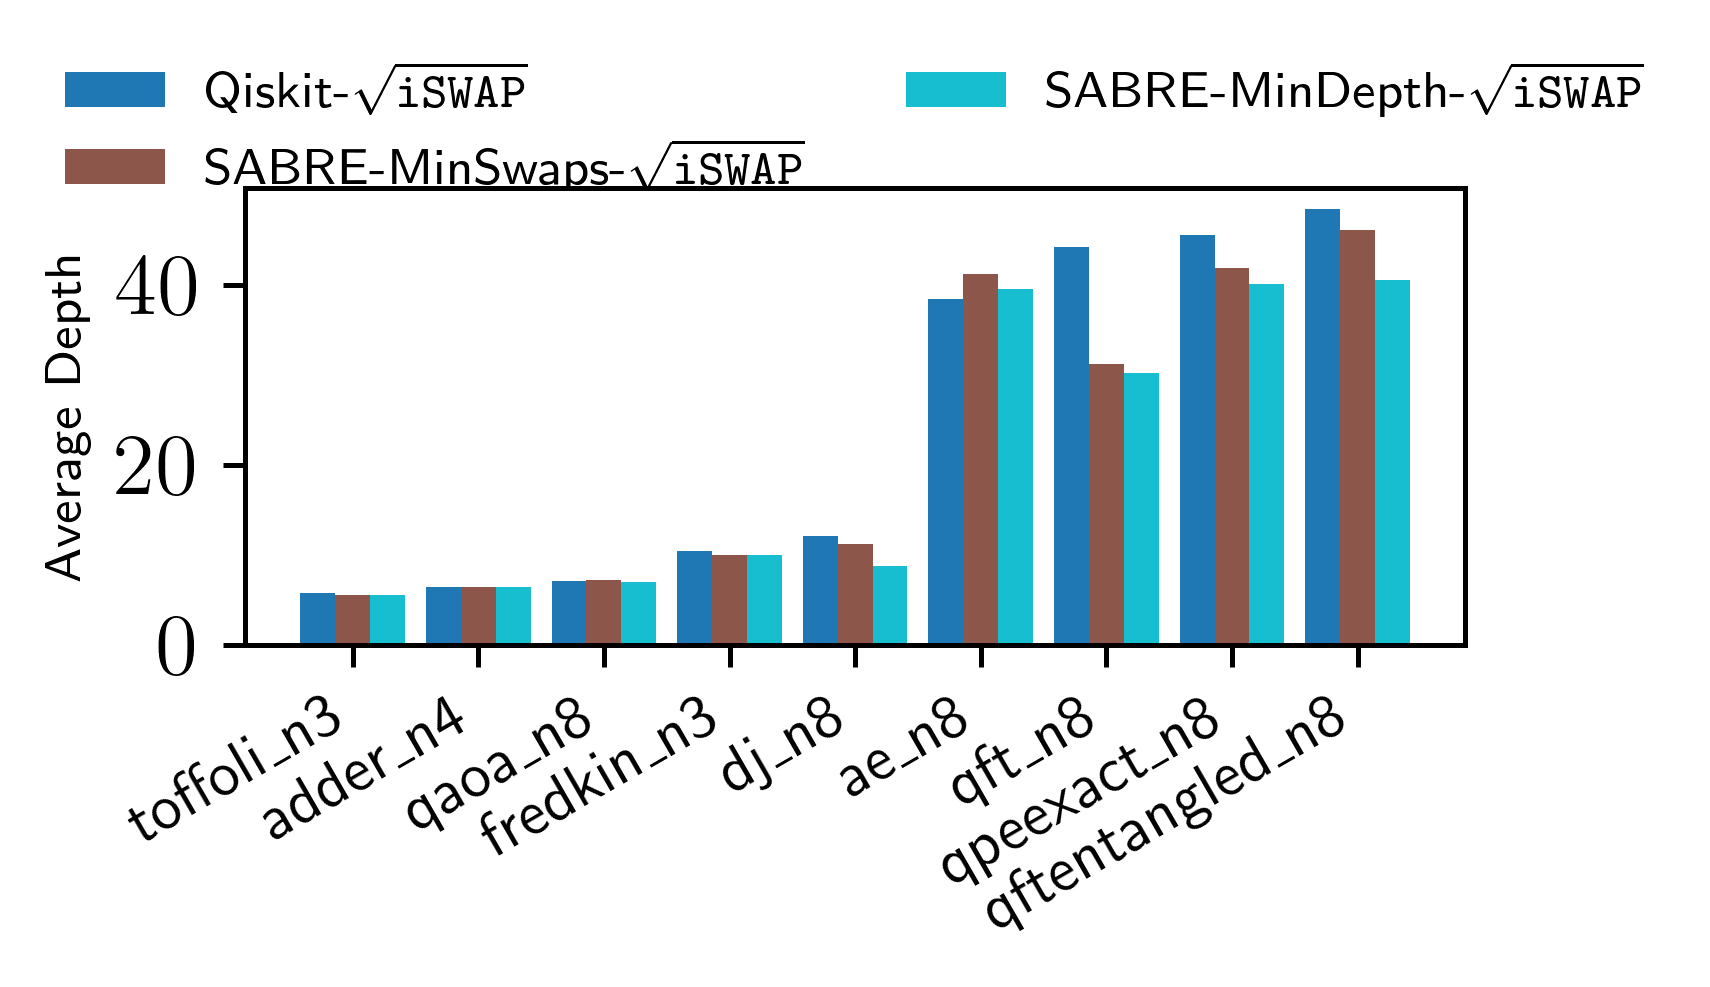

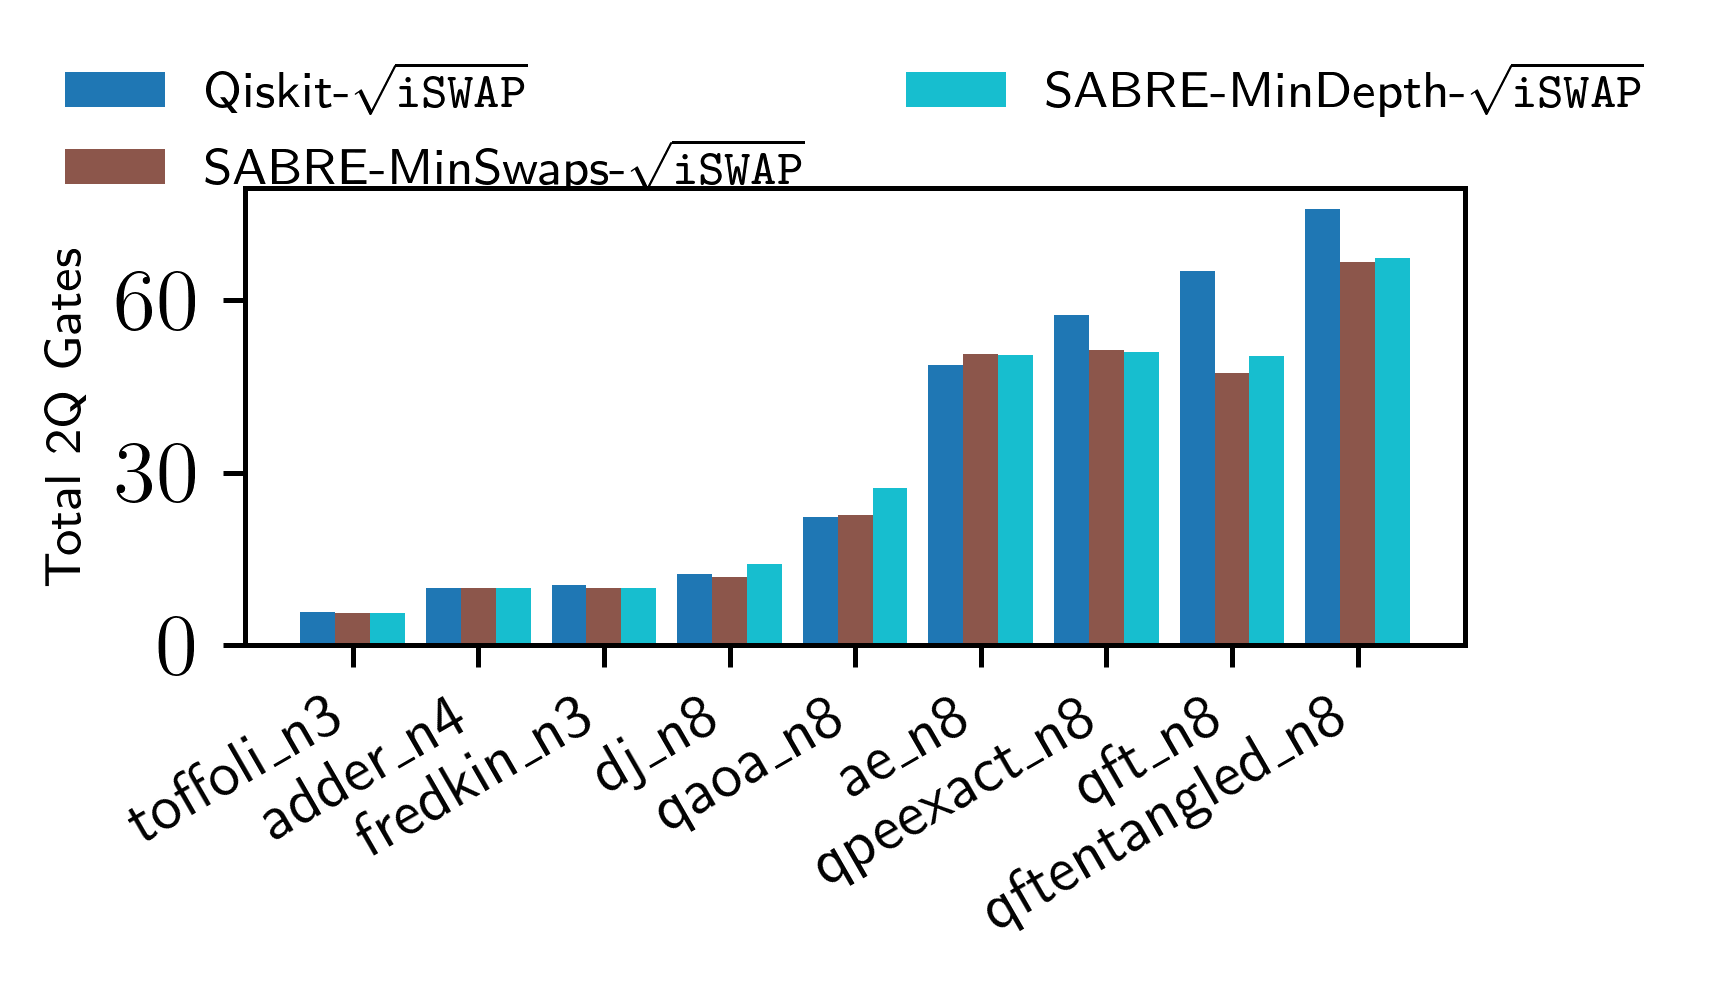

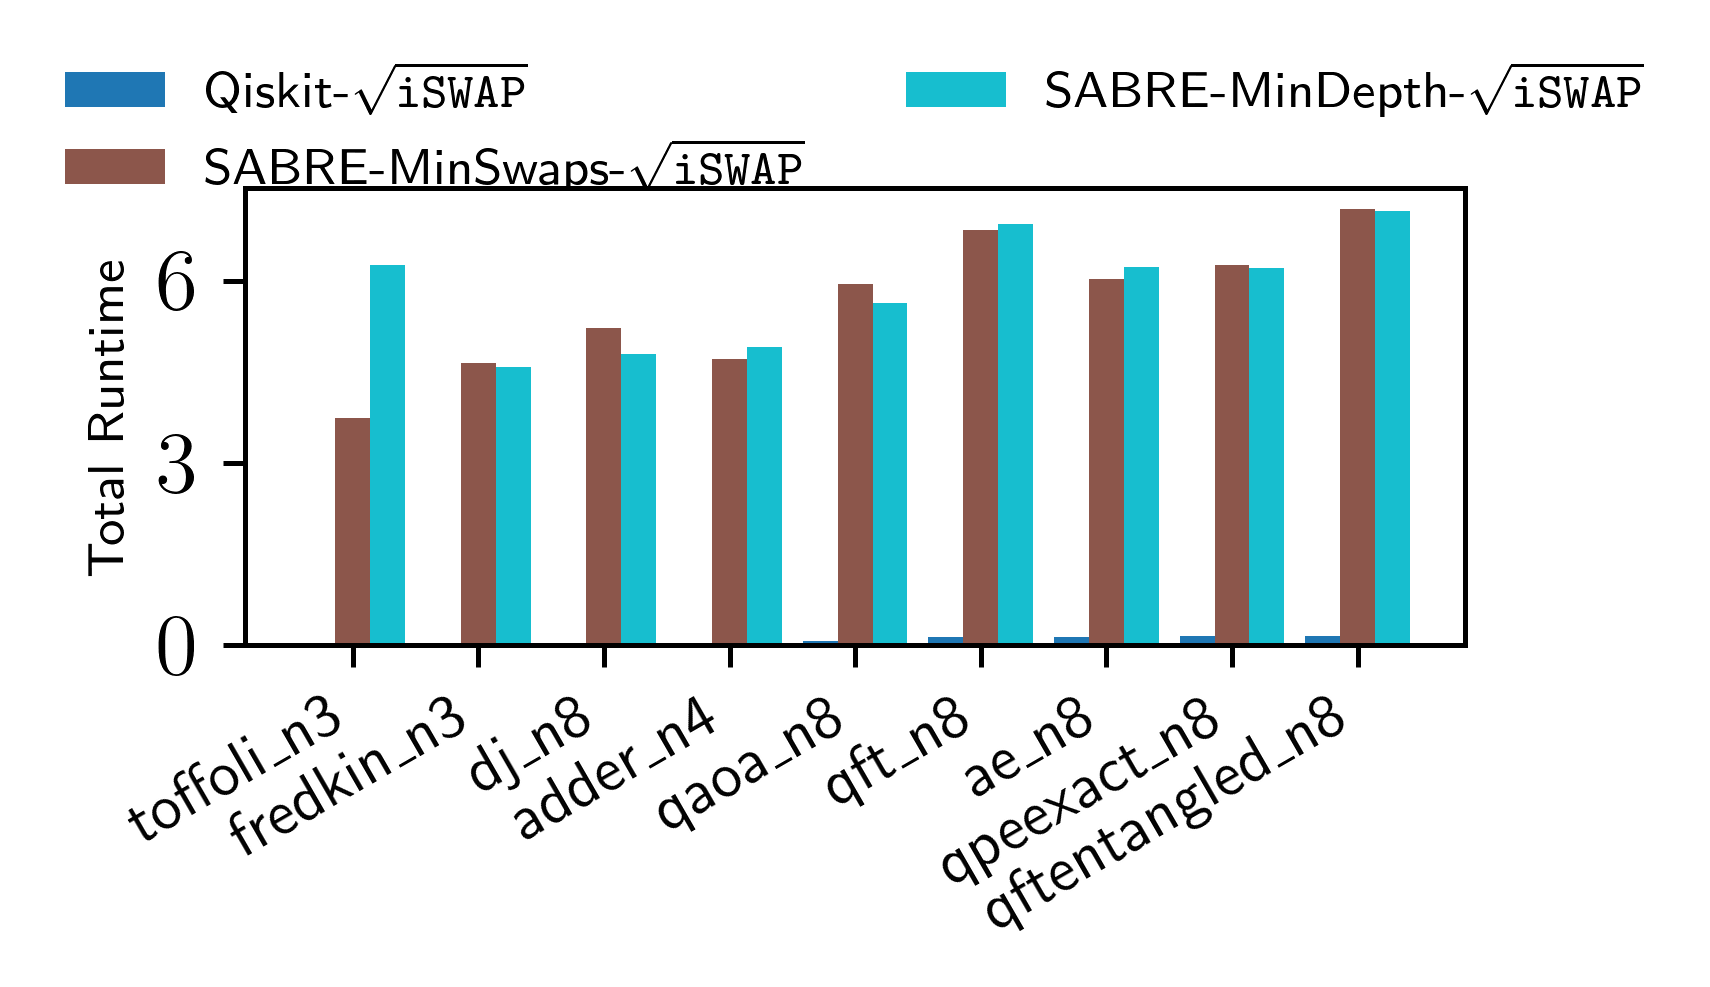

In [ ]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="post")

In [ ]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: monodromy_depth
  Circuit: adder_n4                                 Mean result: 6.500                          Trials: [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5]
  Circuit: ae_n8                                    Mean result: 38.437                         Trials: [35.0, 35.0, 40.0, 42.0, 39.0, 36.5, 39.0, 40.5, 39.0, 39.0]
  Circuit: dj_n8                                    Mean result: 12.096                         Trials: [11.5, 13.0, 13.0, 13.0, 13.0, 11.5, 13.0, 13.0, 10.5, 10.0]
  Circuit: fredkin_n3                               Mean result: 10.500                         Trials: [10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5]
  Circuit: qaoa_n8                                  Mean result: 7.137                          Trials: [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.5]
  Circuit: qft_n8                                   Mean result: 44.175                         Trials: [43.0, 44.5, 43.0, 4